# Práctica Introducción a la Analítica
### Nelson Saturno

# Dataset: Phishing Websites

Utilizando este conjunto de datos, queremos evaluar cierta información sobre sitios en la web
para clasificarlos en: "Phishy", "Suspicious" y "Legitimate"

En este conjunto de datos tenemos las siguientes propiedades y sus valores posibles:

    * index
    * having_IPhaving_IP_Address { -1,1 }
    * URLURL_Length { 1,0,-1 }
    * Shortining_Service { 1,-1 }
    * having_At_Symbol { 1,-1 }
    * double_slash_redirecting { -1,1 }
    * Prefix_Suffix { -1,1 }
    * having_Sub_Domain { -1,0,1 }
    * SSLfinal_State { -1,1,0 }
    * Domain_registeration_length { -1,1 }
    * Favicon { 1,-1 }
    * port { 1,-1 }
    * HTTPS_token { -1,1 }
    * Request_URL { 1,-1 }
    * URL_of_Anchor { -1,0,1 }
    * Links_in_tags { -1,0,1 }
    * SFH { -1,1,0 }
    * Submitting_to_email { -1,1 }
    * Abnormal_URL { -1,1 }
    * Redirect { 0,1 }
    * on_mouseover { 1,-1 }
    * RightClick { 1,-1 }
    * popUpWidnow { 1,-1 }
    * Iframe { 1,-1 }
    * age_of_domain { -1,1 }
    * DNSRecord { -1,1 }
    * web_traffic { -1,0,1 }
    * Page_Rank { -1,1 }
    * Google_Index { 1,-1 }
    * Links_pointing_to_page { 1,0,-1 }
    * Statistical_report { -1,1 }
    * Result { -1,1 }
    
*El conjunto de datos ha sido dascargado de [Kaggle](https://www.kaggle.com/akashkr/phishing-website-dataset) con apoyo de la descripción de los datos*
*encontrada en [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Phishing+Websites)*

Pese a que los datos ya se encuentran transformados a tipo numérico, nos basamos en el paper *[Predicting Phishing Websites based on Self-Structuring
Neural Network](http://eprints.hud.ac.uk/id/eprint/19220/3/RamiPredicting_Phishing_Websites_based_on_Self-Structuring_Neural_Network.pdf)* para obtener el significado de {-1, 0, 1}:
    * -1: Phishy
    *  0: Suspicious
    *  1: Legitimate
    
Dado que los resultados de la clasificación de los sitios web solo vienen en -1 y 1, tenemos un problema de clasificación binaria.
<hr>

### Iniciamos con la importación de las librerías que se van a utilizar

In [100]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

<hr>

### Lectura de Datos

Nota: cambiamos el valor -1 por 2 para utilizar sólo datos positivos.

    * 0: Suspicious
    * 1: Legitimate
    * 2: Phishy

In [102]:
def transform_row(row):
    new_row = []
    for value in row:
        if value == -1:
            new_row.append(2)
        else:
            new_row.append(value)
    return new_row

file_path = 'dataset.csv'
phishing_df = pd.read_csv(file_path).set_index('index').apply(transform_row)
phishing_df.head(5)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,
1,2,1,1,1,2,2,2,2,2,1,...,1,1,2,2,2,2,1,1,2,2
2,1,1,1,1,1,2,0,1,2,1,...,1,1,2,2,0,2,1,1,1,2
3,1,0,1,1,1,2,2,2,2,1,...,1,1,1,2,1,2,1,0,2,2
4,1,0,1,1,1,2,2,2,1,1,...,1,1,2,2,1,2,1,2,1,2
5,1,0,2,1,1,2,1,1,2,1,...,2,1,2,2,0,2,1,1,1,1


<hr>

### Clasificación Binaria

In [103]:
# Obtenemos los datos de la columna de resultados
y = phishing_df['Result']

# Creamos la estructura de datos para utilizar en nuestro modelo
X = np.asarray(
    [
        np.asarray(
            [col for col in pw[:-1]]
        ) for _, pw in phishing_df.iterrows()
    ]
)

<hr>

### Separación de datos de Entrenamiento y Test

En este caso entrenaremos nuestro modelo con el 80% de los datos y realizaremos las pruebas con el 20% restante.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<hr>

### Creación del modelo y ajuste

In [105]:
# Utilizamos el algoritmo 'liblinear', considerando que nuestro problema es de clasificación binaria
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000)

# Ajustamos el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

<hr>

### Resultados y predicción

Ahora obtendermos las constantes *Bn* para nuestra ecuación

*Por la cantidad de variables no se mostrán todas.*

In [106]:
print("Z = {b0} + {b1} · having_IP_Address + {b2} · URL_Length + ... + {b29} · Links_pointing_to_page + {b30} · Statistical_report "
      .format(b0=round(logreg.intercept_[0], 2), b1=round(logreg.coef_[0,0], 2), b2=round(logreg.coef_[0,1], 2),
              b29=round(logreg.coef_[0,28], 2), b30=round(logreg.coef_[0,29], 2)))

Z = -10.88 + 1.11 · having_IP_Address + -0.76 · URL_Length + ... + -0.54 · Links_pointing_to_page + 0.31 · Statistical_report 


### Evaluación del Modelo

1. Accuracy
    * Entrenamiento
    * Test

In [107]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test = logreg.score(X_test, y_test)
print("accuracy_train = {}".format(accuracy_train))
print("accuracy_test = {}".format(accuracy_test))

accuracy_train = 0.8526684758028041
accuracy_test = 0.8340117593848937


<hr>

2. Precisión, Recall, F1:

    * Entrenamiento
    * Test

#### Entrenamiento

In [108]:
# Precision, Recall, F1
classification_train = classification_report(
    y_true=y_train, y_pred=logreg.predict(X_train), target_names=['Legitimate', 'Phishy']
)
print(classification_train)

              precision    recall  f1-score   support

  Legitimate       0.86      0.88      0.87      4896
      Phishy       0.85      0.82      0.83      3948

   micro avg       0.85      0.85      0.85      8844
   macro avg       0.85      0.85      0.85      8844
weighted avg       0.85      0.85      0.85      8844



#### Test

In [109]:
# Precision, Recall, F1
classification_test = classification_report(
    y_true=y_test, y_pred=logreg.predict(X_test), target_names=['Legitimate', 'Phishy']
)
print(classification_test)

              precision    recall  f1-score   support

  Legitimate       0.84      0.87      0.86      1261
      Phishy       0.82      0.79      0.80       950

   micro avg       0.83      0.83      0.83      2211
   macro avg       0.83      0.83      0.83      2211
weighted avg       0.83      0.83      0.83      2211



<hr>

### Matriz de Confusión

In [110]:
# Reutilizando función utilizada en clases
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Entrenamiento

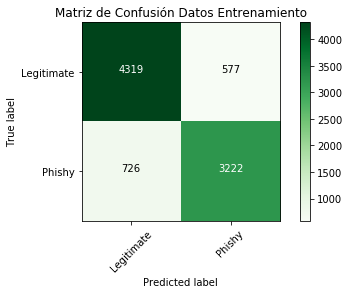

In [111]:
confusion_train = confusion_matrix(y_true=y_train,y_pred=logreg.predict(X_train))
plt.figure()
plot_confusion_matrix(confusion_train, classes=['Legitimate', 'Phishy'], title='Matriz de Confusión Datos Entrenamiento')
plt.show()

#### Test

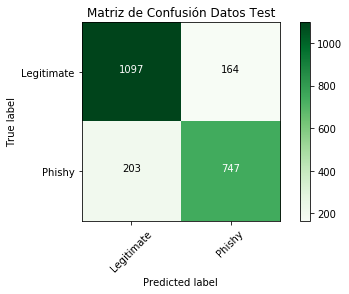

In [112]:
confusion_test = confusion_matrix(y_true=y_test,y_pred=logreg.predict(X_test))
plt.figure()
plot_confusion_matrix(confusion_test, classes=['Legitimate', 'Phishy'], title='Matriz de Confusión Datos Test')
plt.show()